# Workshop 1.1: 🤗 Transformers

## Setup

In [ ]:
!pip install transformers
!pip install sentencepiece

In [1]:
from transformers import pipeline
import textwrap
import pprint

In [2]:
wrapper = textwrap.TextWrapper(width=80, break_long_words=False, break_on_hyphens=False)

In [3]:
text = """Arinobu Fukuhara, former head pharmacist to the Imperial Japanese Navy, established the Shiseido Pharmacy in 1872. After a visit to the United States and Europe, Arinobu added a soda fountain to the store. This later grew into the Shiseido Parlor restaurant business, and eventually led to the introduction of ice cream in Japan. The name Shiseido derives from a Chinese expression meaning "praise the virtues of the earth which nurtures new life and brings forth significant values".
Arinobu passed on his company to his son, Shinzo Fukuhara, who became the company's second president in 1913. After Shinzo's experience traveling to Europe and the United States, he became interested in advertising as a large selling point for Shiseido which lead him to dedicate extensive resources to the company's design, much of which can be been from product packaging and magazines from this time.
"""

In [4]:
print(wrapper.fill(text))

Arinobu Fukuhara, former head pharmacist to the Imperial Japanese Navy,
established the Shiseido Pharmacy in 1872. After a visit to the United States
and Europe, Arinobu added a soda fountain to the store. This later grew into the
Shiseido Parlor restaurant business, and eventually led to the introduction of
ice cream in Japan. The name Shiseido derives from a Chinese expression meaning
"praise the virtues of the earth which nurtures new life and brings forth
significant values". Arinobu passed on his company to his son, Shinzo Fukuhara,
who became the company's second president in 1913. After Shinzo's experience
traveling to Europe and the United States, he became interested in advertising
as a large selling point for Shiseido which lead him to dedicate extensive
resources to the company's design, much of which can be been from product
packaging and magazines from this time.


## Sentiment Analysis

One of the most common tasks in NLP and especially when dealing with customer texts is sentiment analysis. We would like to know if a customer is satisfied with a service or product and potentially aggregate the feedback across all customers for reporting.

![image.png](data/img01.png)

In [5]:
sentiment_pipeline = pipeline('sentiment-analysis')
sentiment_pipeline(text)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9875435829162598}]

In [7]:
sentiment_pipeline(["I don't like cats", "I love dogs", "I don't hate cats"])

[{'label': 'NEGATIVE', 'score': 0.9934830069541931},
 {'label': 'POSITIVE', 'score': 0.999713122844696},
 {'label': 'POSITIVE', 'score': 0.9982847571372986}]

## NER (Named Entity Recognition)

Let's see if we can extract named entities such as organizations, locations, or individuals from the text. This task is called named entity recognition (NER). Instead of predicting just a class for the whole text a class is predicted for each token, thus this task belongs to the category of token classification.
We just load a pipeline for the NER task without specifying a model. This will load a default BERT model that has been trained on the CoNLL-2003.
![image.png](./data/img02.png)

###### ner_pipeline = pipeline('ner')
entities = ner_pipeline(text)
pprint.pprint(entities)

In [9]:
entities = ner_pipeline(text, aggregation_strategy="simple")
pprint.pprint(entities)

[{'end': 16,
  'entity_group': 'PER',
  'score': 0.99697655,
  'start': 0,
  'word': 'Arinobu Fukuhara'},
 {'end': 70,
  'entity_group': 'ORG',
  'score': 0.97540313,
  'start': 48,
  'word': 'Imperial Japanese Navy'},
 {'end': 105,
  'entity_group': 'ORG',
  'score': 0.98787105,
  'start': 88,
  'word': 'Shiseido Pharmacy'},
 {'end': 149,
  'entity_group': 'LOC',
  'score': 0.9996923,
  'start': 136,
  'word': 'United States'},
 {'end': 160,
  'entity_group': 'LOC',
  'score': 0.9997867,
  'start': 154,
  'word': 'Europe'},
 {'end': 169,
  'entity_group': 'PER',
  'score': 0.8817951,
  'start': 162,
  'word': 'Arinobu'},
 {'end': 246,
  'entity_group': 'ORG',
  'score': 0.9673276,
  'start': 231,
  'word': 'Shiseido Parlor'},
 {'end': 328,
  'entity_group': 'LOC',
  'score': 0.9992105,
  'start': 323,
  'word': 'Japan'},
 {'end': 347,
  'entity_group': 'ORG',
  'score': 0.9342818,
  'start': 339,
  'word': 'Shiseido'},
 {'end': 370,
  'entity_group': 'MISC',
  'score': 0.9961182,
  's

In [10]:
for entity in entities:
    print(f"{entity['word']}: {entity['entity_group']} ({entity['score']:.2f})")

Arinobu Fukuhara: PER (1.00)
Imperial Japanese Navy: ORG (0.98)
Shiseido Pharmacy: ORG (0.99)
United States: LOC (1.00)
Europe: LOC (1.00)
Arinobu: PER (0.88)
Shiseido Parlor: ORG (0.97)
Japan: LOC (1.00)
Shiseido: ORG (0.93)
Chinese: MISC (1.00)
Arinobu: PER (0.98)
Shinzo Fukuhara: PER (0.99)
Shinzo: PER (1.00)
Europe: LOC (1.00)
United States: LOC (1.00)
Shiseido: ORG (0.97)


## Question Answering
![image-4.png](./data/img03.png)
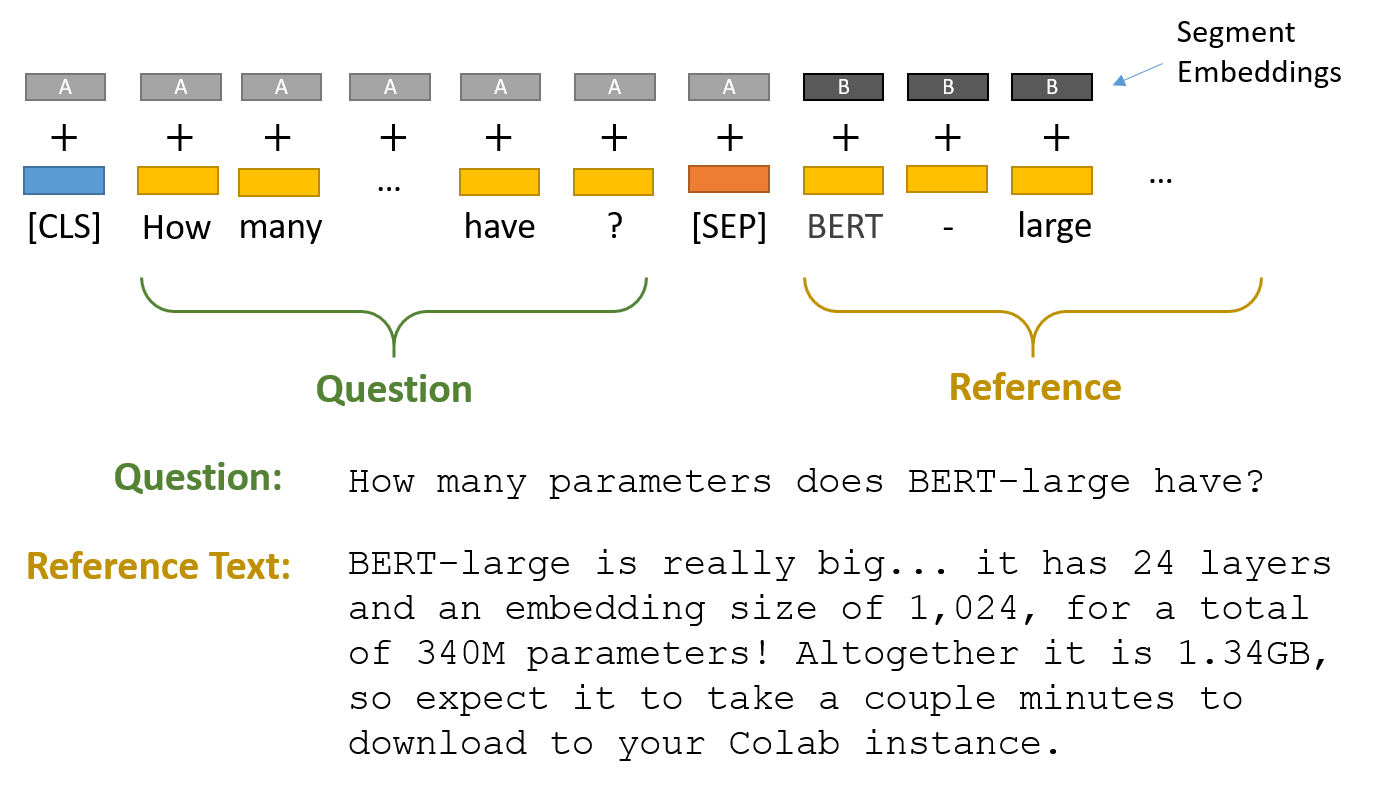
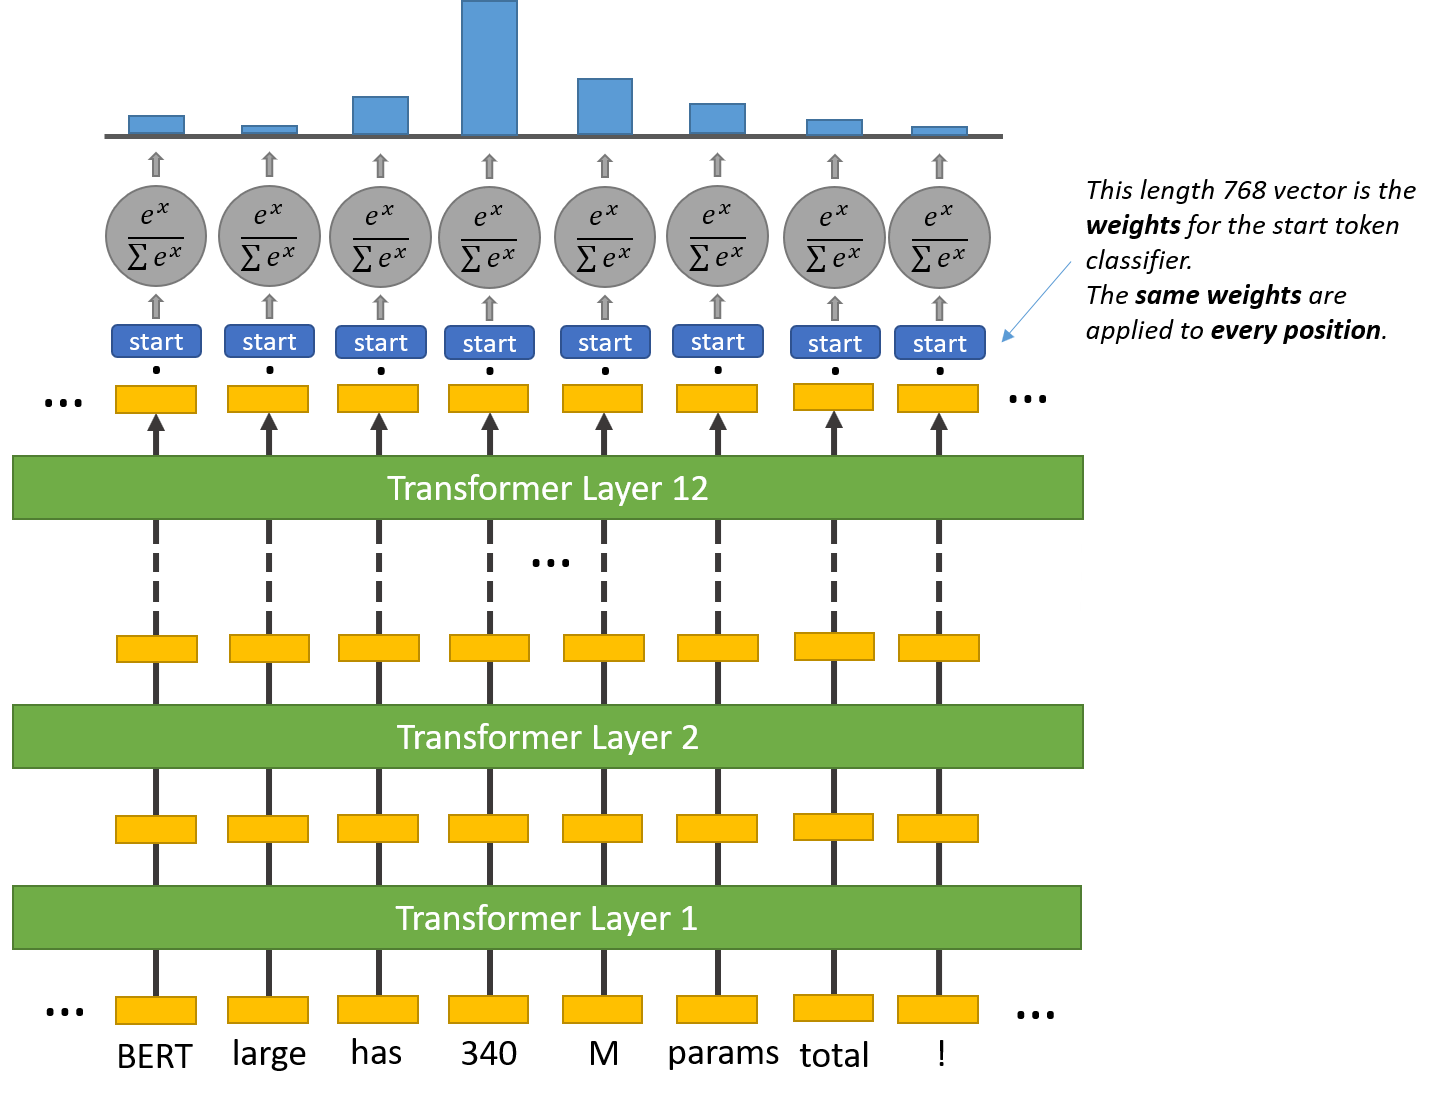
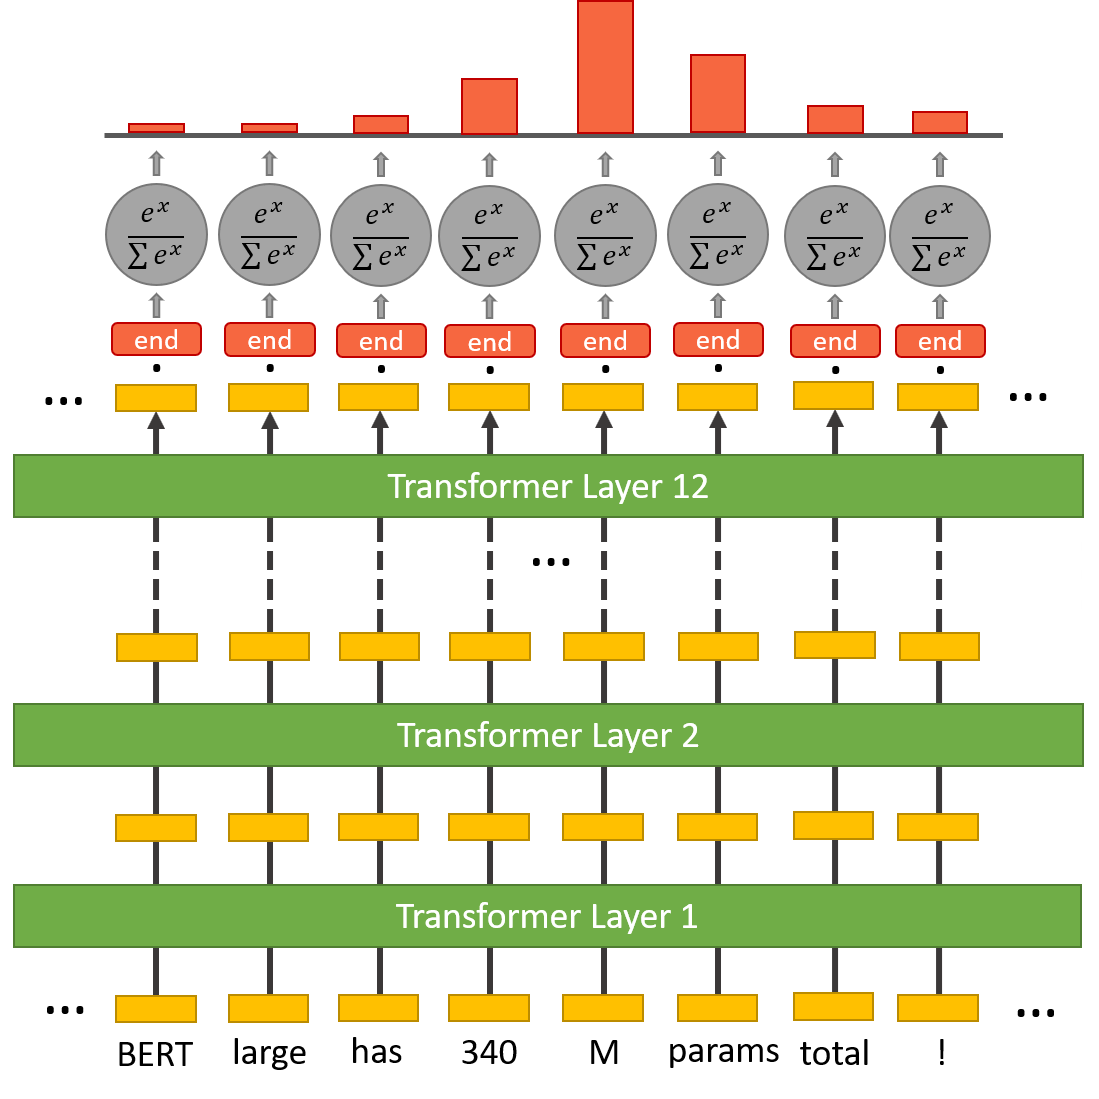

In [11]:
qa_pipeline = pipeline("question-answering")
question = "When was Shiseido founded?"

outputs = qa_pipeline(question=question, context=text)
outputs

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.9900085926055908, 'start': 109, 'end': 113, 'answer': '1872'}

## Summarization

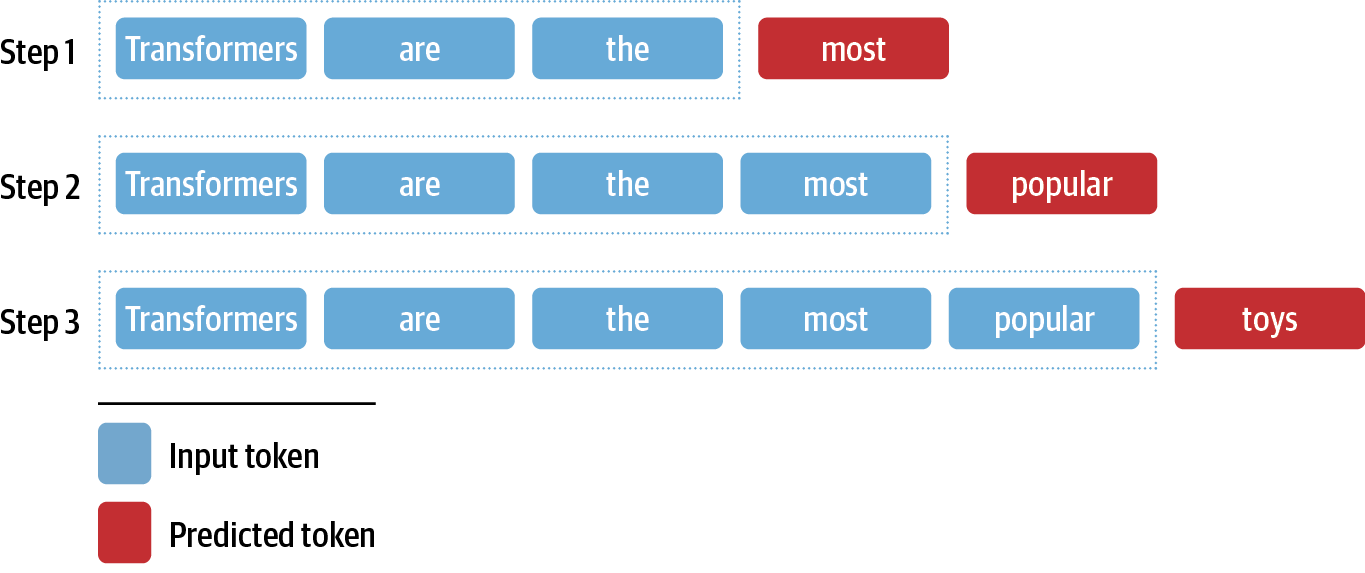

In [12]:
summarization_pipeline = pipeline("summarization")
outputs = summarization_pipeline(text, max_length=60, clean_up_tokenization_spaces=True)
print(wrapper.fill(outputs[0]['summary_text']))

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 Arinobu Fukuhara, former head pharmacist to the Imperial Japanese Navy,
established the Shiseido Pharmacy in 1872. His son, Shinzo, became the company's
second president in 1913. He became interested in advertising as a large selling
point for the company.


## Translation


In [13]:
translator = pipeline("translation_en_to_ja", model="Helsinki-NLP/opus-mt-en-jap")
outputs = translator("welcome to this introduction to transformers", clean_up_tokenization_spaces=True)
print(wrapper.fill(outputs[0]['translation_text']))

C:\Users\jseij\conda3\lib\site-packages\transformers\models\marian\tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


この 記憶 を する 人 に, あいさつ を 与え なさ い.


In [14]:
translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")
outputs = translator("welcome to this introduction to transformers", clean_up_tokenization_spaces=True)
print(wrapper.fill(outputs[0]['translation_text']))

Bienvenidos a esta introducción a los transformadores
